<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/MLPNS_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lezione17 CART
Si tratta di 
##Supervised Learning

Ho una label che voglio predire che conosco per un subset dei dati e voglio generalizzare anche agli altri.

Volgiopredire variabili categoriche, quindi sono nell'ambito della classificazione e non regression.

Esempio Support Vecto Machine: Scelto un tipo di curva ottimizzo la sua forma sulla base della distanza fra i punti e la barriera, modo efficiente che in alcuni casi ottiene risultati eccellenti ma devo poter definire una funzione(polinomio) nel feature space, quindi tutte le variavili devono necessariamente essere umeriche, la variabile categorica è soltanto quella che voglio predire!

KNearest, mi interesso solo dei vicini(gia visto tutto) 

I metodi che vediamo oggi sono tra i più utilizzati e fra quelli che ottengono i risultati migliori e paragonabili al deep learning, ma al contrario del deep learning sono più interpretabili e si prestano a variabili MISTE: sono essenzialmente flow charts, ogni variabile è considerata da sola (a sè stante)

La selezione è binaria nel senso che ho due sole scelte possibili e faccio scelte su una variabile alla volta. \\
Esempio slide: prima splitto lungo x e poi splitto lungo y

Avendo una scelta bionaria ed essendo le scelte indipendenti tra loro posso considerare anche variabili che non sono numeriche(es. il paziente soffre di pressione altao no?).

Dal punto di vista della fisica soprattutto utile il Gradient Boosted Tree vedi LHC e scoperta dell'Higgs \\

Potrei pensare che il deep earning sia il state of the art ma spesso si preferisce il GBT, che ha come pro il fatto che posso usare variabili numeriche, categoriche o del tipo che preferisco 

## Single tree
Non lo userò quasi mai però per iniziare vedo come funziona (in realtà si usano ensamble di alberi)\\
ESEMPIO: 
predire la sopravvivenza dei passeggeri sulla base delle caratteristiche del viaggiatore:\\

Utilizzeremo 
- sesso (var binaria) categorica binaria 
- classe del biglietto (prima seconda o terza ) categorica ma non binaria 
- età sarebbe categorica ma la uso come continua per practice

target variable: sopravvissuto oppure no all'incidente (binaria quindi classificazione)

###procedo con l'albero 
- 1: parto con il sesso: calcolo la probabilità di sopravvivenza per uomo e donna (utilizzo il concetto di purità perchè intuitivo) 
purità = numero di morti / numero totale (ovvero numero dimensione della classe più grande diviso la dimensione del sample) 
- 2: Se fossi partito con la classe? devo intanto scegliere dove tirare la riga metto insieme prima e seconda o seconda e terza? 
- 3: se fossi partito con l'età dovevo definire una threshold 

Quale delle 3 scelte è migliore? quale modello è il migliore in base ai tre risultati? 

Il primo perchè è quello che mi sa le percentuali di PURITÀ MAGGIORE\\

se uso un albero con depth 1 volgio che dopo la mia scelta la classificazione sia la migliore che posso fare \\
##Dopo la prima scelta posso farne altre

-1: dopo il sesso faccio un'altra scelta, per esempio la classe del biglietto (ovviamente devo usare una variabile differente) e poi anche l'età, in particolare per una variabile che non è binaria posso utilizzala di nuovo con una threshold differente\\
Problema! per la variabile età che è continua ho potenzialmente infinite scelte! e quindi infinito tempo per esplorare tutto lo spazio

###problema degli alberi: HIGH VARIANCE
Il mio risultato dipende da delle guesses che sono obbligato a fare! Non è garantito che il modello che ottengo sia il modello migliore, ovvero non è detto che le scelte che ho fatto , per esempio sulle threshold siano quelle ottimali \\
Per questo che userò ensemble trees\\

###Quali sono le scelte che devo ottimizzare? hyperparameters
- Criterio (quello che prima era la purità) il più comune è il Gini 
- Profondità dell`albero: quante decisioni posso fare. In teoria potrei continuare fino a quando per ogni foglia ho soltanto un elemento ma OVERFITTING! La maximun depth default è infinito ma ovviamente è molto pericoloso, di solito si setta su valori molto bassi (un alternativa sarebbe fare una pepth molto grande e poi andare a ritroso per cercare a che punto si otteneva il risutlato miglio ma non è molto comune in sklearn


###Se voglio fare regression 
La predizione diventa un range, ancora di più devo fare attenzione alla max depth, va a finire che fitto il rumore. 
Esempio con la sinusoide: depth piccola risultato troppo coarse ma depth grande overfitting sul rumore!


Attenzione gli outliers!

### Modo per avere soluzioni ottimali 

Un modo col quale posso ottimizzare qualcosa, per ridurre la high variance è fare una scelta ottimale localmente, il risultato migliore che ottengo a quel punto dell'algoritmo: è un modo di procedere che è greedy, con i contro che ne conseguono


##Risolvo la high variance con ENSEMBLE TREES
Faccio andare N alberio e ottengo un risultato collettivo

Molto comune come tecnica, uso un ensamble di modelli, è qui che cadono 
-Random Forest: serie di alberi che vanno in parallelo, ogni albero è indipendente, come se fosse un albero singolo, in più ogniuno degli alberi non sceglie tutti i dati e / o tutte le variabili (bootstrap/bagging), il modo in cui scelgo la classificazione faccio una maggioranza. 
Vantaggio che posso trattare questa decisione come probabilistica (probabilità di sopravvivenza, anche se formalmente e statisticamente non lo è!)


-Gradient boosted tree: alberi in serie, le scelte dell'albero successivo dipendono dal precedente, cambio dei pesi in base all'importanza delle feature all'interno dell'albero precedente

Quanto è grande la mia foresta è un altro hyperparametro e dipende dalla quantità di dati, di variabili e altro... 

Appare il LEARNING RATE: quanta importanza do al gradiente sulla modifica dei parametri, cioè quanopt rapidamente incorporo le informazioni ottenute dall'albero preceddente(?)




##CODICE TITANIC

In [1]:
import pandas as pd 
import numpy as np 
import pylab as pl 
import json 
import os 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
cd gdrive/MyDrive

/content/gdrive/MyDrive


In [5]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [6]:
mkdir kaggletitanic

mkdir: cannot create directory ‘kaggletitanic’: File exists


In [7]:
cd kaggletitanic

/content/gdrive/MyDrive/kaggletitanic


In [8]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Ovviamente nelle challenge pubblicano solo il training set così testano loro sul test set e non posso fare tuning apposta per il test set\\
Noi ce ne freghiamo e all'interno del trainig estraiamo un trainig e un test per poterci lavorare

In [10]:
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
titanic = titanic[["Pclass","Sex","Age"]]
titanic.shape

(891, 3)

In [13]:
titanic.describe()
#non mi dice il gender perchè non è un numero ma varaibile categorica sttaa come una string, 
#della quale non può fare una statistica


#noto che è interessante che ho dati solo per 714 persone riguardo l'età, tutto il resto lo dovrò buttare!
#ci sarebbero modelli che posso usare lo stesso ma non quelli di sklearn

,Pclass,Age
count,891.000000,714.000000
mean,2.308642,29.699118
std,0.836071,14.526497
min,1.000000,0.420000
25%,2.000000,20.125000
50%,3.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [14]:
titanic.dropna(inplace = True )
#posso pensare di usa fillna per cambiare i valori che mancano e settarli su qualcosa
#per esempio assegnare la media, la mediana o il valore della linea sopra
# con altri metodi potrei usa il knearest neighbor

<ipython-input-14-0b20cab67afe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(inplace = True )


In [15]:
#per utilizzare la variabile categorica la mappo su 0 e 1 
# poi droppo la colonna che non mi serve più 

titanic["Gender"]=titanic["Sex"].map({"male": 0, "female":1})
titanic.drop("Sex", axis=1, inplace=True )

<ipython-input-15-042811244236>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Gender"]=titanic["Sex"].map({"male": 0, "female":1})
<ipython-input-15-042811244236>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.drop("Sex", axis=1, inplace=True )


A questo punto ha fatto una grid search per ottenenre i numeri delle threshold, boh roba noiosa che ci risparmia, è quello che ha uisato per le scelte mostrate nelle slide
//
tutto comunque è nel notebook titanic...

In [16]:
#Non sto facendo standardizzazione e whitening!
#c'è un motivo: tratto le variabili una alla volta quindi non mi iteresso 
#che siano su ordini di grandezza molto diversi 

#non devo mettere insieme le variabili, non mi interessa che abbiano regimi differenti 

#cosa succede se ho variabili che sono completamente correlate? (es età e ano di nascita)
# una delle due diventa inutile, l'albero le usa indifferentemente



#problemino se uso ensemble method, il risultato non ne risente in nessun modo
#però ciò che ne risente è l'importanza associata alla variabile 



In [17]:
from sklearn import tree
#clf per classifier

clf = tree.DecisionTreeClassifier(random_state=420)

In [18]:
#fittare richiede sia il feature space che la target variable, che non avevo salvato! 
titanic_target = pd.read_csv("train.csv")
titanic_target = titanic_target[["Survived", "Age"]].dropna()
titanic_target = titanic_target["Survived"]


In [20]:
#potrei avere paura di passare un intero dataframe 
#quindi uso values per passare tutti i valori ma non la struttura dati dataframe 

clf.fit(titanic.values, titanic_target.values)

DecisionTreeClassifier(random_state=420)

In questo problema è un problema di binary clas classification, quindi molto facile valutare il modello!

Il modello devo soltato scelgiere survived oppure dead, facile fare la cofusion matrix

Di solito uno dei due risultati lo battezzo positive e l'altro negative, ovviamente non ha importanza ogni tanto scelta ovvia dipende soltanto da cose come voglio minimizzare i false positive o false negative

Esempio classico classificazione delle spam o no, false positive è un messaggio imoportante che finisce in spam, un false negative è una spam nell'inbox, ovviamente è meno peggio la seconda cosa rispetto alla prima 

In [21]:
#vedi slide sulle metriche per valutare l'accuratezza (precision, recall, accuracy)


#il metodo score mi dice l'accuratezza del modello 
#vuole che gli passi un x e y, sarà diverso quando ho train e 
#test set ma per ora gli passo i dati di prima 

clf.score(titanic.values, titanic_target.values)

0.896358543417367

In [22]:

import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=titanic.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data) 

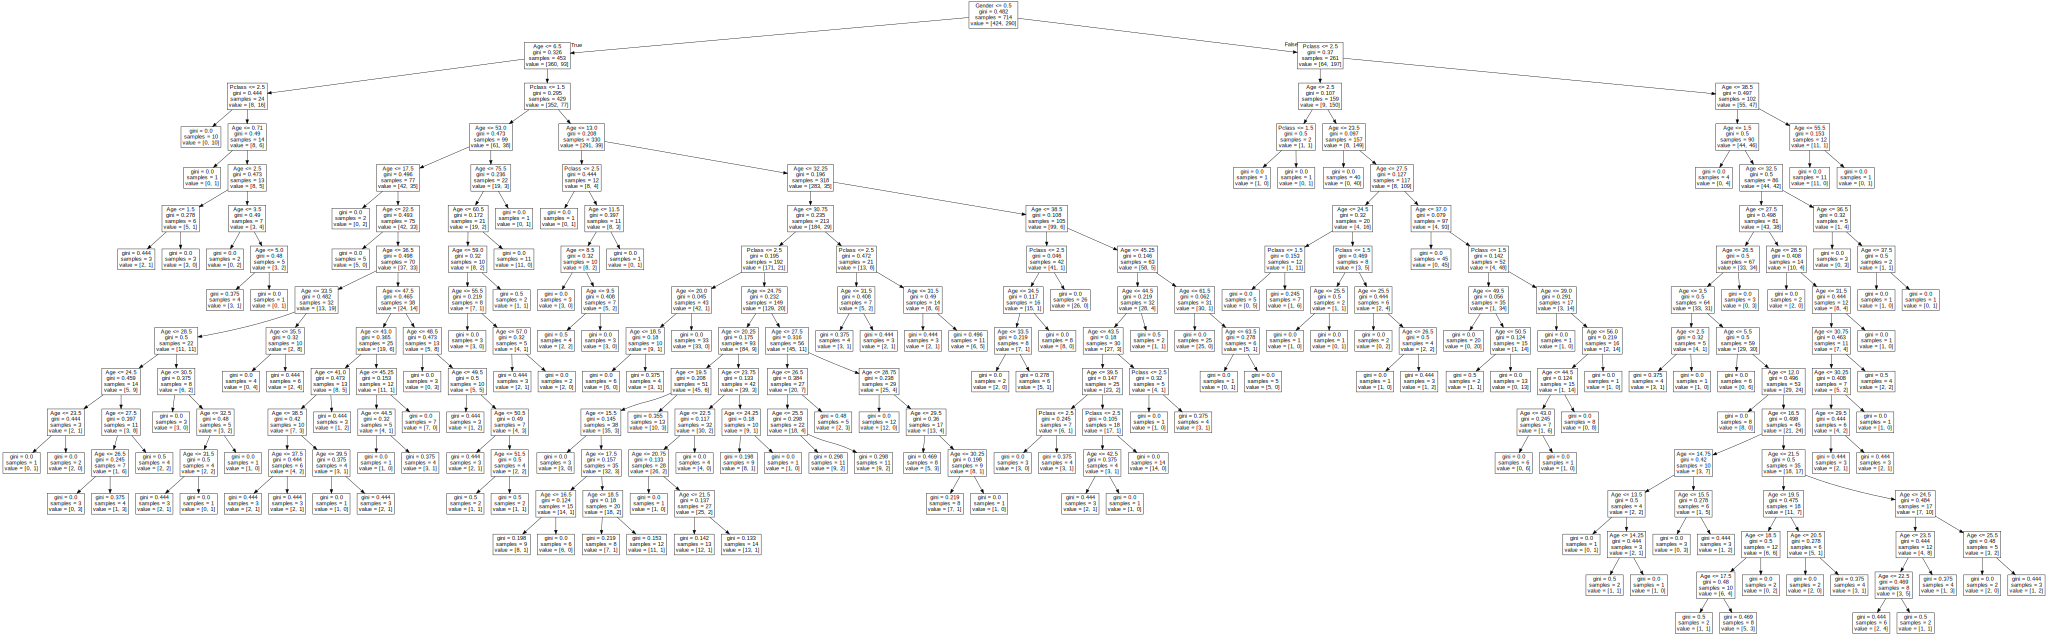

In [23]:
graph

In [27]:
#Complessità troppo elevata! 
#Forte sospetto di overfitting
#sistemo settando una profondità massima 

clf = tree.DecisionTreeClassifier(max_depth = 5, random_state=420)
clf.fit(titanic.values, titanic_target.values)

DecisionTreeClassifier(max_depth=5, random_state=420)

In [28]:
clf.score(titanic.values, titanic_target.values)

0.8263305322128851

In [29]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=titanic.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data) 

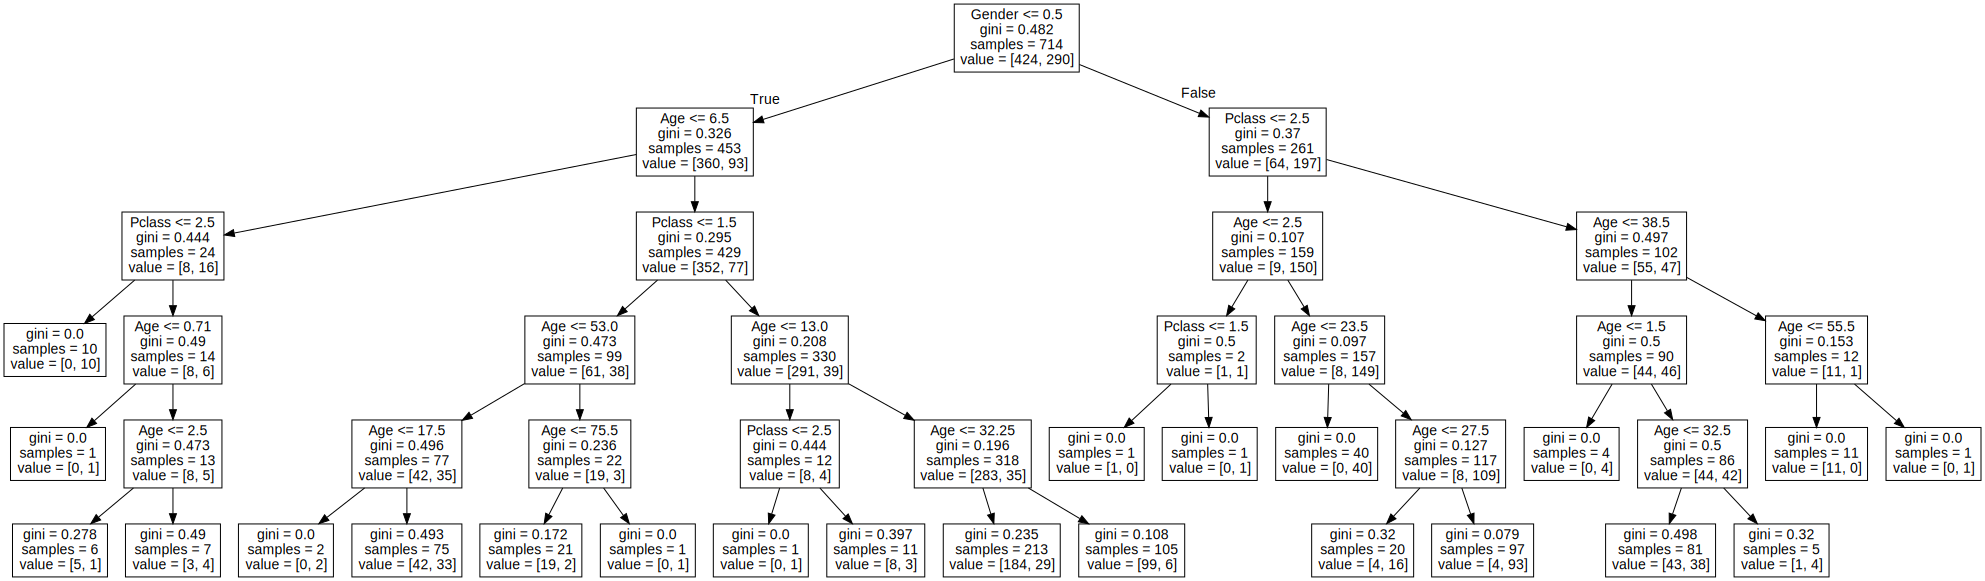

In [30]:
graph


In [31]:
#ok più leggibile rispetto a prima 
#cosa dovrei fare per assiucurarmi di non aver fatto overfitting? train e test set!

from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(titanic.values, titanic_target.values, test_size=0.2)

In [33]:
#il modello è già creato e va bene, mi basta rifittarlo passandogli i vettori di training
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=420)

In [35]:
#e adesso calcolo lo score
clf.score(x_train,y_train)

0.8231173380035026

In [36]:
clf.score(x_test,y_test)

0.8601398601398601

###Cosa voglio vedere? 
1- calcolo lo score passando i dati di training \\
2- calcolo lo score passando i dati di test

Se ho fatto poco overfitting questi due score dovrebbero esserre vicini, altrimenti ho ottimizzato troppo per il training!!
\\
Se ho fatto overfitting vuol dire che dove cambiare qualche hyperparameter

###Esempio 
Posso provare a rifare un modello ma con massima profondità a 3, ovviamente perdo in accuratezza ma guadagno nel senso che non ho overfitting (vedi notebook con i risultati di questa cosa)



#Lezione 18 (Venerdì)

Encoding categorical variables, non più 0 o 1 come nel caso del gender del titanic
Per esempio ora specie, età e peso

Uso peso e età come variabili continue.

Creo per ogni categoria all'interno della variabile categorica una nuova variabile binaria, per esempio per ogni specie creo una variabile categorica binaria: "one-hot encoding". 

Problemi: 
- Ho grande inflazione del numero di varaibili, prefeisco stare in spazi di dimensione bassa
- Le variabili sono strettamente correlate, non posso essere di due specie contemporaneamente e il mio codice non lo sa, éutilizza come variabili indipendenti

Problematico in modelli che assumono indipendenza delle variabili, però in random forest non è un problema, si raccomanda random forest


###Feature importance
Quali sono le varaibili più importanti nel determinare qualcosa? 
Si fa col random tree forest: si stima l'influenza di ciascuna delle varaibili sul modello, ovviamente se faccio one-hot encoding perdo questa caratteristica, una qualunque delle variabili che creo non avranno mai un importanza cos' elevata come invece potrebbe avere la variabile categorica tenuta insieme!

  